1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [3]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

[[2.66816227e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.06903332e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.90472189e-29]]
The  92.80% of variability is explained by the first component
If we remove the dimension associated with the eigenvalue 1.905e-29 we still have 100.00% variability


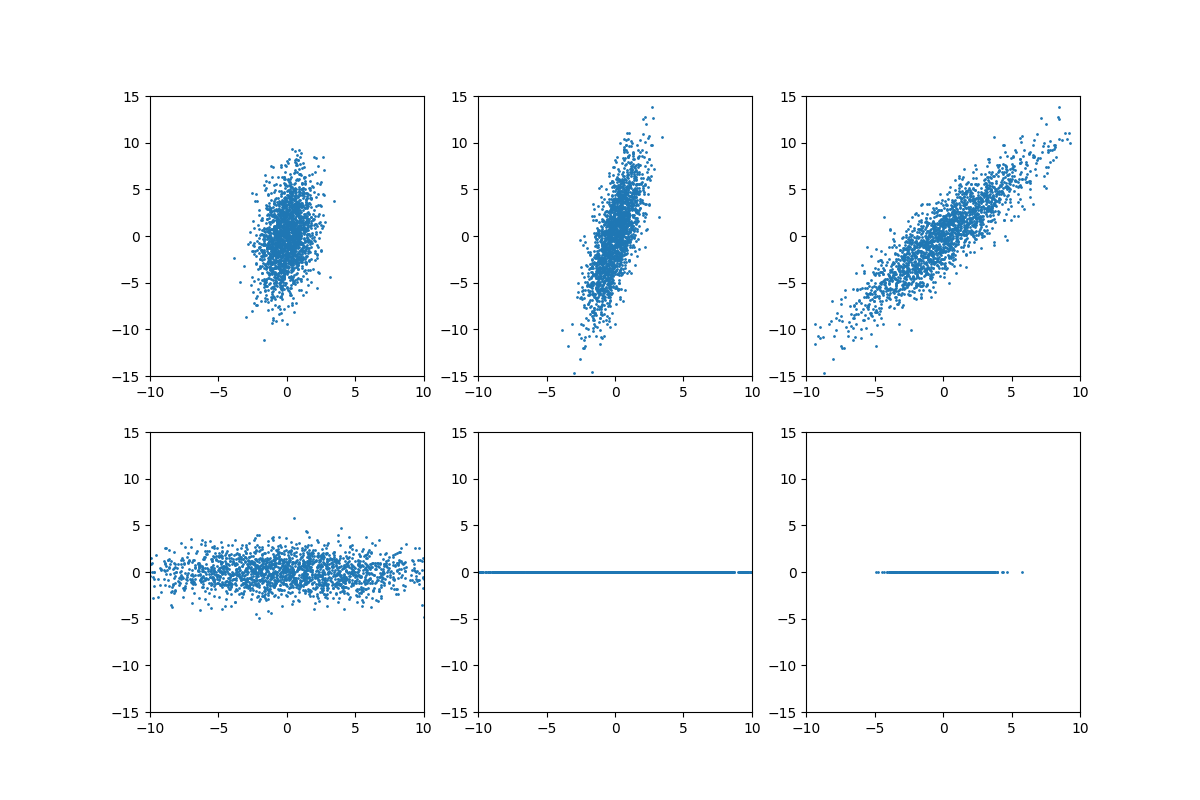

In [4]:
N = 2000

X = np.zeros(shape=(3, N))

X[0, :] = np.random.normal(loc=0, scale=1, size=N)
X[1, :] = X[0, :] + np.random.normal(loc=0, scale=3, size=N)
X[2, :] = 2 * X[0, :] + X[1, :]


X = X - X.mean(axis=1).reshape(3, 1)
cov_mat = np.cov(X)

avl, eigenv = la.eig(cov_mat)
U, spectrum, Vt = la.svd(X)
avl_svd = spectrum**2 / (N-1)
eigenv_svd = U

# print(avl)
# print(avl_svd)
# print(np.real_if_close(avl))
# avl_sv = np.real_if_close(avl_svd)
llambda = np.diag(avl_svd)
print(llambda)

# print(cov_mat.trace())
# print(llambda.trace())

print(f"The {llambda[0,0]/llambda.trace()*100: .2f}% of variability is explained by the first component")
variability2 = (llambda[0,0] + llambda[1,1]) / llambda.trace()

print(f"If we remove the dimension associated with the eigenvalue {avl_svd[2]:.4g} we still have {variability2 * 100:.2f}% variability")

eigenv_svd[:, 2] = 0
Xp = np.dot(eigenv_svd.T, X)


fig, axs = plt.subplots(2, 3, figsize=(12,8))


projs = [(0, 1), (0, 2), (1, 2)]
for k, (x_pr, y_pr) in enumerate(projs):
    axs[0, k].set_xlim(-10,10)
    axs[0, k].set_ylim(-15,15)
    axs[0, k].scatter(X[x_pr, :], X[y_pr, :], s=1)

for k, (x_pr, y_pr) in enumerate(projs):
    axs[1, k].set_xlim(-10,10)
    axs[1, k].set_ylim(-15,15)
    axs[1, k].scatter(Xp[x_pr, :], Xp[y_pr, :], s=1)






2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

Devo mettere a media zero i dati?
Mettiamo la telecamera in posizione (theta, phi) (deg):  -90 -45
Ruoto i dati:
Axis: [-0.70710678 -0.70710678  0.        ]
Angle: 90.0
[[ 5.00000000e-01  5.00000000e-01 -7.07106781e-01]
 [ 5.00000000e-01  5.00000000e-01  7.07106781e-01]
 [ 7.07106781e-01 -7.07106781e-01  1.11022302e-16]]
Ottengo gli avl e gli avt usando SVD:
Avl: [2.53952779e-01 5.02725937e-34 0.00000000e+00]
Autovettori:
[[ 7.07106781e-01  7.81953871e-17  7.07106781e-01]
 [ 7.07106781e-01  7.81953871e-17 -7.07106781e-01]
 [-1.10584977e-16  1.00000000e+00  1.10584977e-16]]
Traccia della matrice diagonale di avt: 0.25395277858839516 della matrice di cov: 0.25395277858839516
The  100.00% of variability is explained by the first component
Ruoto il dataset in base alla matrice degli avt (tenendo solo il primo) ottenuta dall'analisi PCA, avt:
[[ 7.07106781e-01  0.00000000e+00  0.00000000e+00]
 [ 7.07106781e-01  0.00000000e+00  0.00000000e+00]
 [-1.10584977e-16  0.00000000e+00  0.00000000e+0

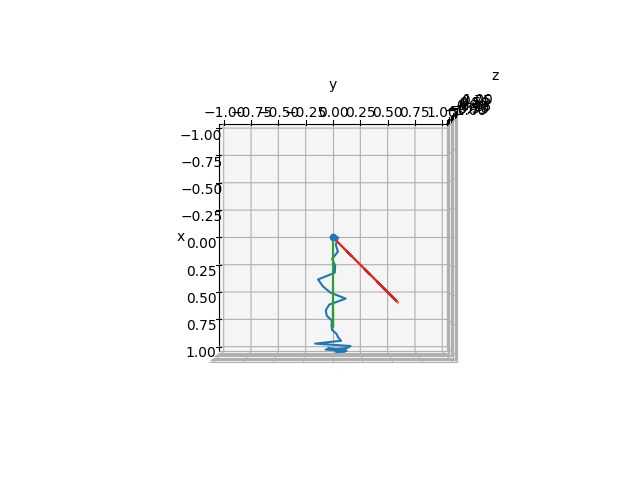

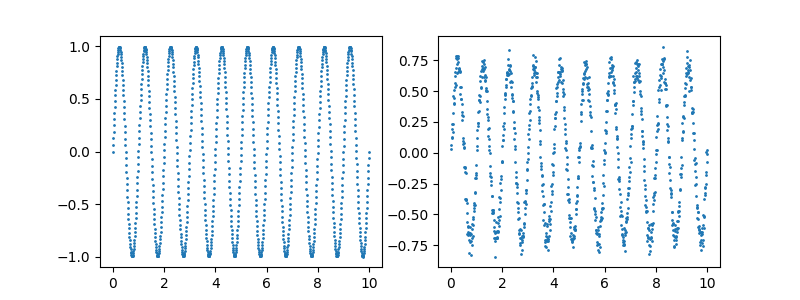

In [12]:
%matplotlib widget
N = 1000 
f = 1
time_range = np.linspace(0, 10, num=N)
X = np.zeros(shape=(3, N))
X[0, :] = np.sin(2 * np.pi * time_range * f)
X[1, :] = np.random.normal(size=N) * 8e-2
X[2, :] = np.zeros(shape=N)
# plt.plot(time_range, y_data)


def get_rot_matrix(theta, phi):
    ref = np.array([0, 0, 1])
    direction = np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])

    if theta == 0:
        axis = np.array([0, 0, 1])
        angle = phi
    else:
        axis = np.cross(ref, direction)
        angle = np.arccos(np.dot(ref, direction))
    axis = axis / np.linalg.norm(axis)
    rot = R.from_rotvec(axis*angle).as_matrix()
    # print("Direction:", direction)
    print("Axis:", axis)
    print("Angle:", np.rad2deg(angle))
    print(rot)
    return rot

def get_avl_avt_svd(data):
    U, spectrum, Vt = np.linalg.svd(data)
    l_svd = spectrum**2/(len(data)-1)
    V_svd = U
    return l_svd, V_svd

def get_avl_avt(data):
    avl, eigenv = la.eig(np.cov(data))
    # print(avl, eigenv)
    # print(get_avl_avt_svd(data))
    avl = np.real_if_close(avl)
    mask = np.flip(np.argsort(avl))
    return avl[mask], eigenv[:, mask]

theta = -90
phi = -45
use_proj = True

print("Devo mettere a media zero i dati?")

print("Mettiamo la telecamera in posizione (theta, phi) (deg): ", theta, phi)
print("Ruoto i dati:")
rot = get_rot_matrix(np.deg2rad(theta), np.deg2rad(phi))
Xr = rot @ X

Xproj_r = np.zeros(shape=Xr.shape)
Xproj_r[0, :] = Xr[0, :]
Xproj_r[1, :] = Xr[1, :]
Xproj = np.linalg.inv(rot) @ Xproj_r

X_used = Xproj if use_proj else Xr

print("Ottengo gli avl e gli avt usando SVD:")
avl, avt = get_avl_avt(X_used)
print("Avl:", avl)
print("Autovettori:")
print(avt)
llambda = np.diag(avl)
print("Traccia della matrice diagonale di avt:", llambda.trace(), "della matrice di cov:", np.cov(X_used).trace())

print(f"The {llambda[0,0]/llambda.trace()*100: .2f}% of variability is explained by the first component")

avt[:,1] = 0
avt[:,2] = 0
Xr_p = np.dot(avt.T, X_used)
print("Ruoto il dataset in base alla matrice degli avt (tenendo solo il primo) ottenuta dall'analisi PCA, avt:")
print(avt)
print("Somma delle seconde componenti:", np.sum(Xr_p[1, :]), "delle terze:", np.sum(Xr_p[2, :]))

Xr_pp = np.dot(avt.T, Xr_p)

ax = plt.figure().add_subplot(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
end = 30
ax.scatter([0], [0], [0],s=20, label='parametric curve')
ax.plot(X[0, :end], X[1, :end], X[2, :end], label='parametric curve')
ax.plot(Xr[0, :end], Xr[1, :end], Xr[2, :end], label='parametric curve')
ax.plot(Xr_p[0, :end], Xr_p[1, :end], Xr_p[2, :end], label='parametric curve')
if use_proj:
    ax.plot(Xproj[0, :end], Xproj[1, :end], Xproj[2, :end], label='parametric curve')
# plt.plot(Xr_pp[0, :end], Xr_pp[1, :end], Xr_pp[2, :end], label='parametric curve')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(90, 0, 0)

fig, axs = plt.subplots(1, 2, figsize=(8, 3))
axs[0].scatter(time_range, X[0, :], s=1)
axs[1].scatter(time_range, Xr_p[0, :], s=1)




Direction: [0.70710678 0.         0.70710678]
Axis: [0. 1. 0.]
Angle: 45.0
[[ 0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]
 [-0.70710678  0.          0.70710678]]
[[ 0  0  1]
 [ 0 -1  0]
 [ 0  0  0]]
[[ 0.          0.          0.70710678]
 [ 0.         -1.          0.        ]
 [ 0.          0.         -0.70710678]]


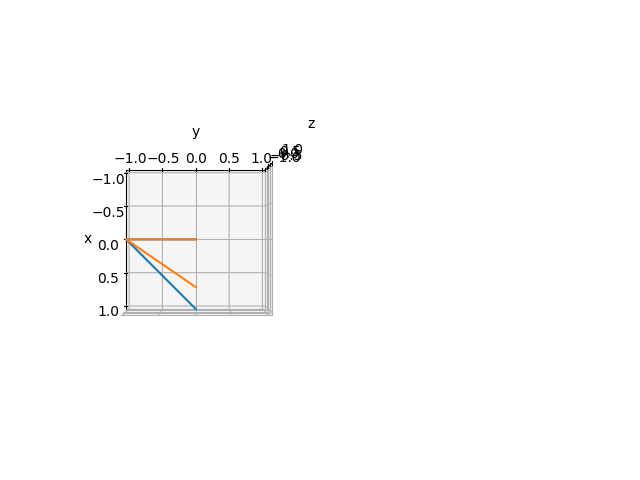

In [18]:
theta = np.deg2rad(45)
phi = np.deg2rad(0)

ref = np.array([0, 0, 1])
direction = np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])

if theta == 0:
    axis = np.array([0, 0, 1])
    angle = phi
else:
    axis = np.cross(ref, direction)
    angle = np.arccos(np.dot(ref, direction))
axis = axis / np.linalg.norm(axis)
rot = R.from_rotvec(axis*angle).as_matrix()
print("Direction:", direction)
print("Axis:", axis)
print("Angle:", np.rad2deg(angle))
print(rot)

vec0 = np.array([0, 0, 0])
vec = np.array([0, -1, 0])
vec2 = np.array([1, 0, 0])
res = np.hstack((vec0.reshape(3, 1), vec.reshape(3, 1), vec2.reshape(3, 1)))
res_rot = rot @ res
print(res)
print(res_rot)

ax = plt.figure().add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(res[0, :], res[1, :], res[2, :], label='parametric curve')
ax.plot(res_rot[0, :], res_rot[1, :], res_rot[2, :], label='parametric curve')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.view_init(90, 0, 0)


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 